<a href="https://colab.research.google.com/github/VittorLima/lia1_2024_2/blob/main/ENTREGAS-VittorLima/23_09-Cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Machine Learning de Ponta a Ponta**
## Previsão de Preços de Casas na Califórnia
Este notebook realiza um projeto de aprendizado de máquina de ponta a ponta
para prever preços de casas na Califórnia usando um conjunto de dados de censo.
Vamos passar pelas etapas de carregamento de dados, exploração, preparação,
treinamento de modelo e avaliação final.

In [ ]:
#@title Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#@title **1. Carregar e Explorar os Dados**
# Função para carregar os dados do repositório
def load_housing_data():
    url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    return pd.read_csv(url)

# Carregar o dataset
housing = load_housing_data()

# Mostrar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
display(housing.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
housing.info()

# Descrição estatística dos dados numéricos
print("\nDescrição estatística do dataset:")
display(housing.describe())

# Verificar a distribuição das variáveis categóricas
print("\nDistribuição das categorias em 'ocean_proximity':")
print(housing['ocean_proximity'].value_counts())

Primeiras linhas do dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Descrição estatística do dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Distribuição das categorias em 'ocean_proximity':
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


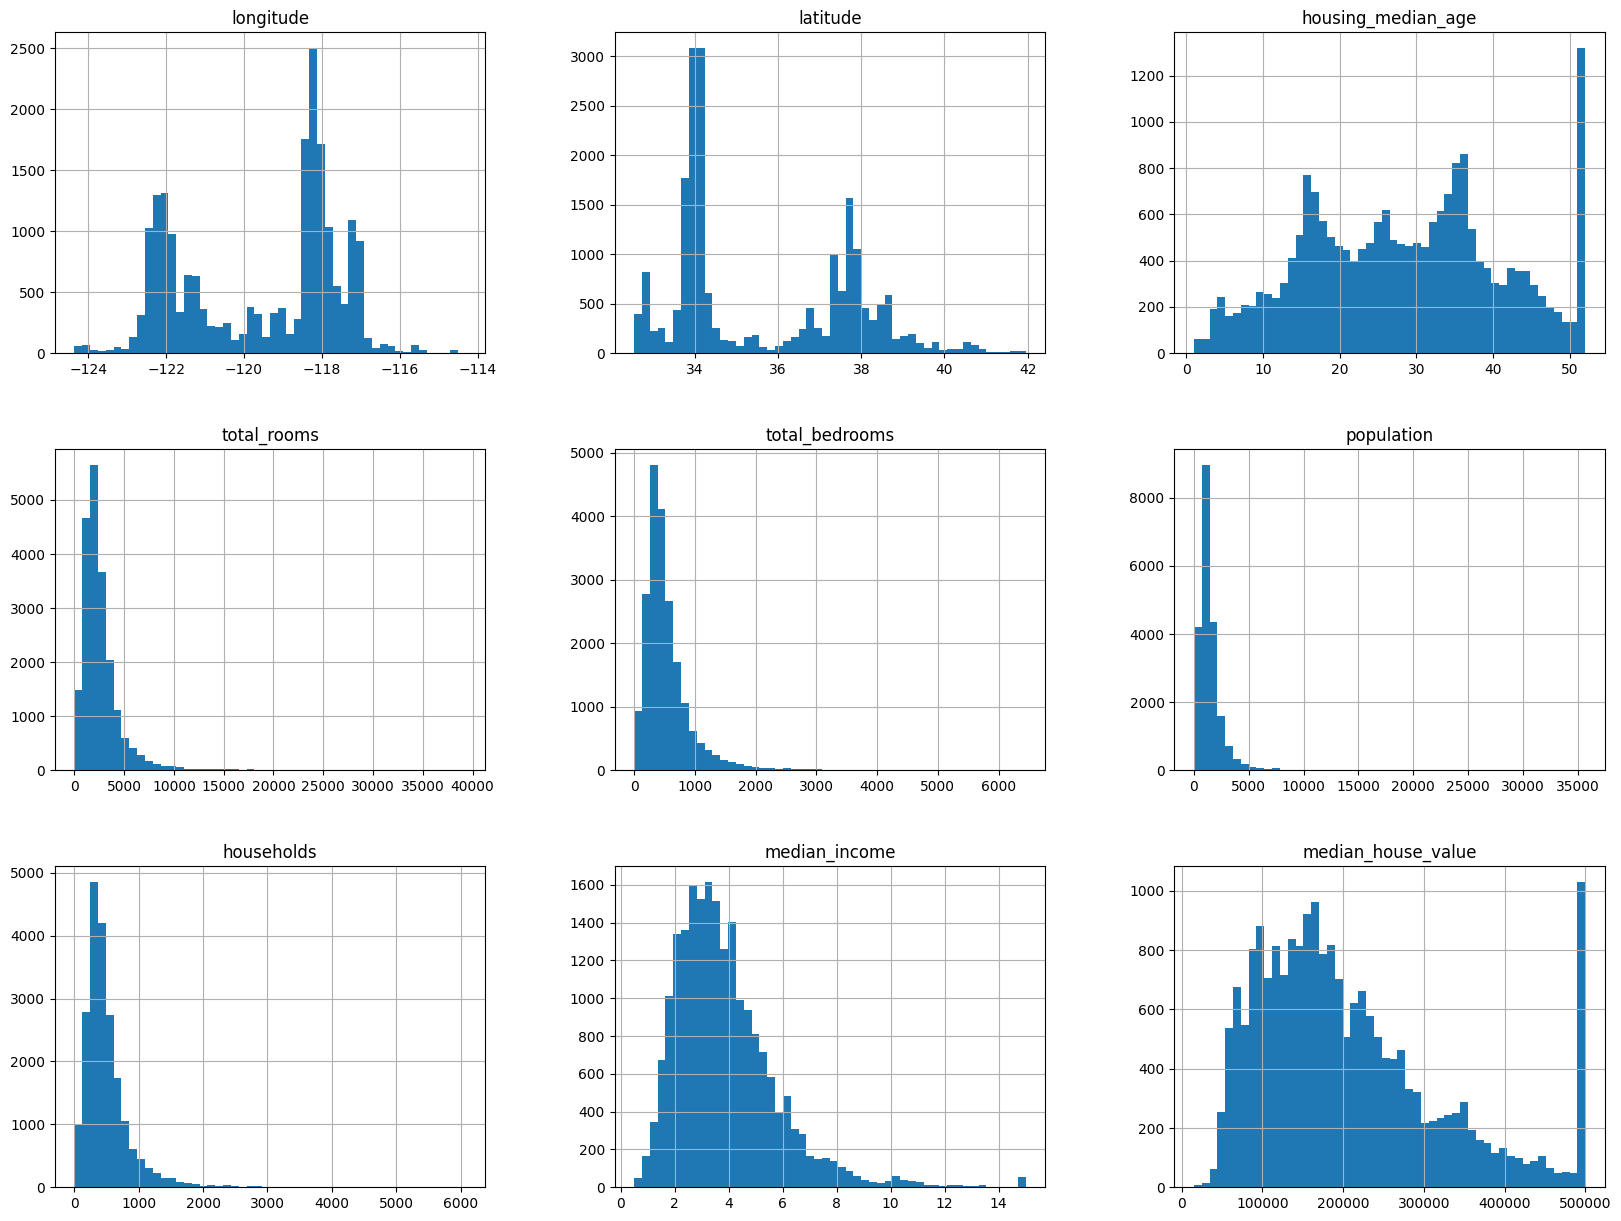

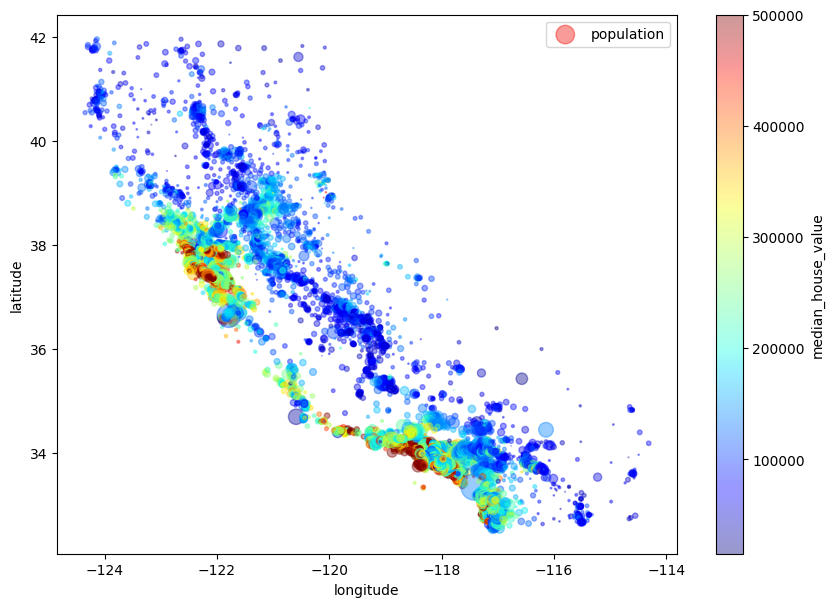

In [ ]:
#@title **2. Visualização dos Dados**
# Histogramas das variáveis numéricas
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Gráfico de dispersão geográfica dos preços das casas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

In [ ]:
#@title **3. Dividir os Dados em Treinamento e Teste**
# Dividindo o conjunto de dados em treinamento (80%) e teste (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos
print(f"Conjunto de treinamento: {len(train_set)} instâncias")
print(f"Conjunto de teste: {len(test_set)} instâncias")

Conjunto de treinamento: 16512 instâncias
Conjunto de teste: 4128 instâncias


In [ ]:
#@title **4. Preparação dos Dados para Treinamento**
# Separando previsores e rótulo (label)
housing = train_set.drop("median_house_value", axis=1)  # Retirar a variável alvo
housing_labels = train_set["median_house_value"].copy() # Manter a variável alvo separada

# Pipeline para pré-processamento dos dados numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),  # Tratar valores ausentes
        ('std_scaler', StandardScaler()),  # Escalonamento dos dados numéricos
    ])

# Seleção dos atributos numéricos e categóricos
num_attribs = list(housing.select_dtypes(include=[np.number]))
cat_attribs = ["ocean_proximity"]

# Pipeline completo para pré-processamento
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Aplicar o pipeline aos dados de treinamento
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#@title **5. Treinamento de Modelos**
# Treinando um modelo de RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# Prevendo no conjunto de treinamento
housing_predictions = forest_reg.predict(housing_prepared)

# Avaliando o modelo no conjunto de treinamento
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de treinamento: {forest_rmse:.2f}")

Erro quadrático médio raiz (RMSE) no conjunto de treinamento: 18073.21


In [ ]:
#@title **6. Avaliação com o Conjunto de Teste**
# Separando previsores e rótulo no conjunto de teste
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# Transformando os dados de teste utilizando o pipeline de pré-processamento
X_test_prepared = full_pipeline.transform(X_test)

# Prevendo no conjunto de teste
final_predictions = forest_reg.predict(X_test_prepared)

# Avaliando o modelo no conjunto de teste
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de teste: {final_rmse:.2f}")

Erro quadrático médio raiz (RMSE) no conjunto de teste: 48941.70


In [ ]:
#@title **7. Ajuste de Hiperparâmetros com GridSearchCV**
# Utilizaremos o GridSearchCV para encontrar a melhor combinação de hiperparâmetros para o modelo RandomForestRegressor.
# Definindo os parâmetros para a busca
param_grid = [
    {'n_estimators': [50, 100, 200], 'max_features': [6, 8, 10], 'max_depth': [10, 15, 20]}
]

# Instanciando o modelo
forest_reg = RandomForestRegressor(random_state=42)

# Configurando o GridSearchCV com 5-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Ajustando o modelo
grid_search.fit(housing_prepared, housing_labels)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Melhor estimador
best_forest_reg = grid_search.best_estimator_

# Avaliando o modelo ajustado no conjunto de teste
final_predictions_grid = best_forest_reg.predict(X_test_prepared)
final_mse_grid = mean_squared_error(y_test, final_predictions_grid)
final_rmse_grid = np.sqrt(final_mse_grid)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de teste (GridSearch): {final_rmse_grid:.2f}")

Melhores Hiperparâmetros: {'max_depth': 20, 'max_features': 6, 'n_estimators': 200}
Erro quadrático médio raiz (RMSE) no conjunto de teste (GridSearch): 48646.95


In [ ]:
#@title **8. Ajuste de Hiperparâmetros com RandomizedSearchCV**
# Agora vamos usar o RandomizedSearchCV para realizar uma busca mais ampla e eficiente por hiperparâmetros.
# Definindo os parâmetros para a busca
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_features': randint(4, 12),
    'max_depth': randint(10, 30)
}

# Configurando o RandomizedSearchCV com 10 iterações e 5-fold cross-validation
random_search = RandomizedSearchCV(forest_reg, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, return_train_score=True)

# Ajustando o modelo
random_search.fit(housing_prepared, housing_labels)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros (RandomizedSearch):", random_search.best_params_)

# Melhor estimador
best_forest_reg_random = random_search.best_estimator_

# Avaliando o modelo ajustado no conjunto de teste
final_predictions_random = best_forest_reg_random.predict(X_test_prepared)
final_mse_random = mean_squared_error(y_test, final_predictions_random)
final_rmse_random = np.sqrt(final_mse_random)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de teste (RandomizedSearch): {final_rmse_random:.2f}")

Melhores Hiperparâmetros (RandomizedSearch): {'max_depth': 20, 'max_features': 6, 'n_estimators': 137}
Erro quadrático médio raiz (RMSE) no conjunto de teste (RandomizedSearch): 48595.52


In [ ]:
#@title **9. Experimentando Outros Algoritmos: Support Vector Regressor**
# Vamos experimentar outro algoritmo, Support Vector Regressor (SVR), para comparar com o modelo RandomForest.
# Configurando o modelo SVR
svm_reg = SVR(kernel='rbf')

# Pipeline para treinar e ajustar o modelo
svm_pipeline = Pipeline([
    ("preprocessor", full_pipeline),
    ("svm_reg", svm_reg)
])

# Ajustando o modelo com os dados de treinamento
svm_pipeline.fit(train_set.drop("median_house_value", axis=1), train_set["median_house_value"])

# Avaliando o modelo SVR no conjunto de teste
svm_predictions = svm_pipeline.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de teste (SVR): {svm_rmse:.2f}")


Erro quadrático médio raiz (RMSE) no conjunto de teste (SVR): 116917.38


In [ ]:
#@title **10. Experimentando Outros Algoritmos: Gradient Boosting Regressor**
# Vamos experimentar o Gradient Boosting Regressor, um algoritmo poderoso para tarefas de regressão.
# Instanciando o modelo
gbrt = GradientBoostingRegressor(random_state=42)

# Ajustando o modelo
gbrt.fit(housing_prepared, housing_labels)

# Avaliando o modelo Gradient Boosting no conjunto de teste
gbrt_predictions = gbrt.predict(X_test_prepared)
gbrt_mse = mean_squared_error(y_test, gbrt_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
print(f"Erro quadrático médio raiz (RMSE) no conjunto de teste (Gradient Boosting): {gbrt_rmse:.2f}")


Erro quadrático médio raiz (RMSE) no conjunto de teste (Gradient Boosting): 55903.12


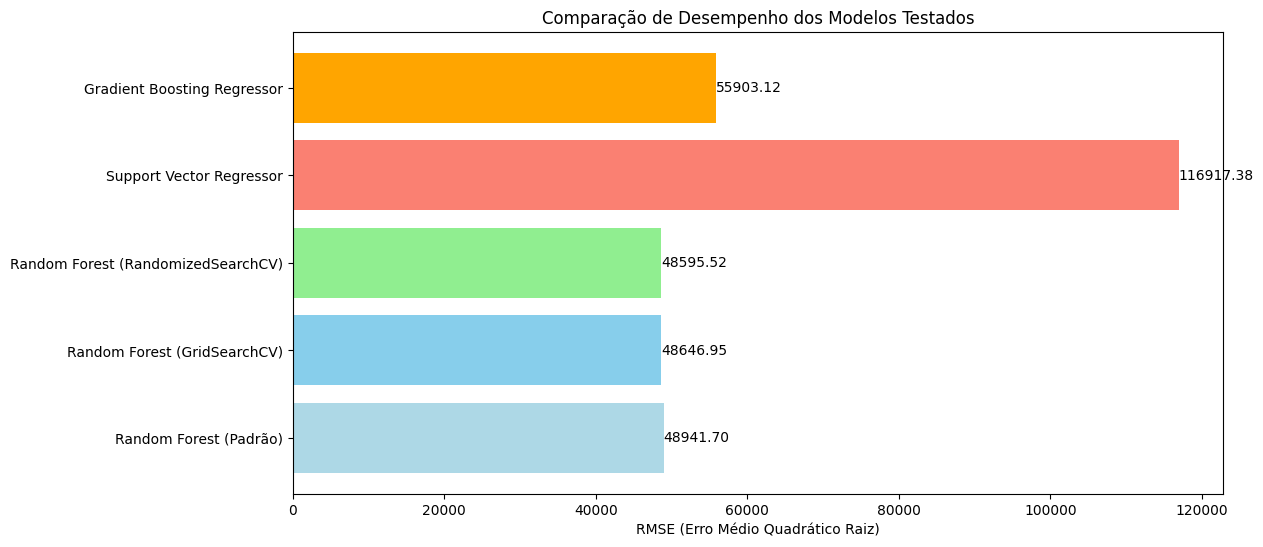

In [ ]:
#@title **Comparação do Desempenho dos Modelos Testados**
# Resultados obtidos para cada modelo
model_names = [
    "Random Forest (Padrão)",
    "Random Forest (GridSearchCV)",
    "Random Forest (RandomizedSearchCV)",
    "Support Vector Regressor",
    "Gradient Boosting Regressor"
]

# Vamos calcular o RMSE para o modelo Random Forest padrão
forest_reg.fit(housing_prepared, housing_labels)  # Ajuste do modelo padrão
forest_predictions = forest_reg.predict(X_test_prepared)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)

# Adicionando o RMSE do modelo Random Forest padrão aos resultados
rmse_scores = [
    forest_rmse,  # Random Forest padrão
    final_rmse_grid,  # Melhor modelo de RandomForest com GridSearch
    final_rmse_random,  # Melhor modelo de RandomForest com RandomizedSearch
    svm_rmse,  # Suporte Vector Regressor
    gbrt_rmse  # Gradient Boosting Regressor
]

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(model_names, rmse_scores, color=['lightblue', 'skyblue', 'lightgreen', 'salmon', 'orange'])
plt.xlabel('RMSE (Erro Médio Quadrático Raiz)')
plt.title('Comparação de Desempenho dos Modelos Testados')

# Anotação dos valores de RMSE em cada barra
for bar, rmse in zip(bars, rmse_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{rmse:.2f}', va='center')

# Exibição do gráfico
plt.show()
